In [105]:
import pandas as pd
import numpy as np


In [106]:
df = pd.read_csv('/content/train.csv').drop(columns='subject')

In [107]:
df.shape

(7352, 562)

In [108]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [109]:
df['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [110]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop('Activity',axis=1)
y = df['Activity']

le = LabelEncoder()

In [111]:
y = le.fit_transform(y)

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [113]:
 # apply logistic regression
 log_reg = LogisticRegression(max_iter=1000)
 log_reg.fit(X_train,y_train)
 y_pred = log_reg.predict(X_test)
 accuracy_score(y_test,y_pred)

0.9802855200543847

Remove duplicate columns


In [114]:
df.columns[df.T.duplicated()]


Index(['tBodyAccMag-sma()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()',
       'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-min()',
       'tGravityAccMag-sma()', 'tGravityAccMag-energy()',
       'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()',
       'tGravityAccMag-arCoeff()1', 'tGravityAccMag-arCoeff()2',
       'tGravityAccMag-arCoeff()3', 'tGravityAccMag-arCoeff()4',
       'tBodyAccJerkMag-sma()', 'tBodyGyroMag-sma()', 'tBodyGyroJerkMag-sma()',
       'fBodyAccMag-sma()', 'fBodyBodyAccJerkMag-sma()',
       'fBodyBodyGyroMag-sma()', 'fBodyBodyGyroJerkMag-sma()'],
      dtype='object')

In [115]:
df = df.loc[:,~df.T.duplicated()]

Apply Variance Threshold

In [116]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

In [117]:
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [118]:
sum(sel.get_support())

np.int64(369)

In [ ]:
columns = X_train.columns[sel.get_support()] 

In [120]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train,columns=columns)
X_test = pd.DataFrame(X_test,columns=columns) 

In [122]:
X_train.shape

(5881, 369)

Correlation

In [123]:
X_matrix = X_train.corr()

In [124]:
columns = X_matrix.columns

columns_to_drop =  []

for i in range(len(columns)):
  for j in range(i+1,len(columns)):
    if X_matrix.loc[columns[i],columns[j]] > 0.95:
      columns_to_drop.append(columns[j])


In [125]:
columns_to_drop = set(columns_to_drop)

In [126]:
len(columns_to_drop)

217

In [127]:
X_train.drop(columns=columns_to_drop,axis=1,inplace=True)
X_test.drop(columns=columns_to_drop,axis=1,inplace=True)


Anova

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(f_classif,k=100).fit(X_train,y_train)


In [129]:
X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [130]:
sel.set_output(transform="pandas")


SelectKBest(k=100)

In [131]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [132]:
X_train.shape

(5881, 100)

Re apply Logistic Regression

In [133]:
 # apply logistic regression
 log_reg = LogisticRegression(max_iter=1000)
 log_reg.fit(X_train,y_train)
 y_pred = log_reg.predict(X_test)
 accuracy_score(y_test,y_pred)

0.9694085656016316

In [135]:
df1 = pd.read_csv('/content/train (1).csv')[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]

In [136]:
df1.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


In [137]:
pd.crosstab(df1['Survived'],df1['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [138]:
from scipy.stats import chi2_contingency


In [139]:
score = []
for feature in df1.columns[:-1]:
  ct = pd.crosstab(df1['Survived'],df1[feature])
  score.append(chi2_contingency(ct)[1])

<Axes: >

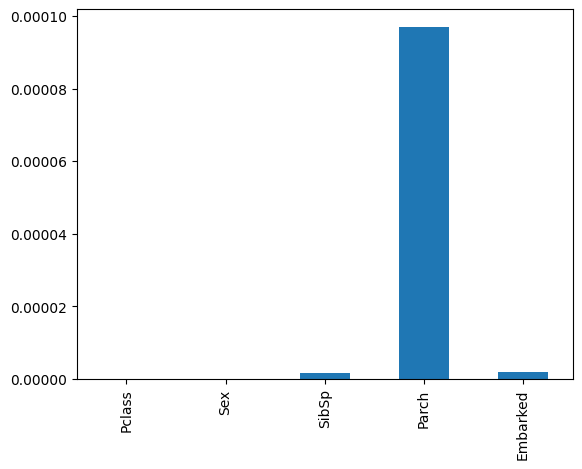

In [140]:
pd.Series(score,index=df1.columns[:-1]).plot(kind='bar')